<a href="https://colab.research.google.com/github/DeepPandya30/Minor-Project/blob/main/Ant_Colony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generation 1: Best Path = [(0, 0), (1, 0), (2, 0), (3, 0), (2, 0), (3, 0), (3, 1), (4, 1), (4, 2), (3, 2), (4, 2), (4, 3), (5, 3), (5, 4), (5, 5)], Length = 15
Generation 2: Best Path = [(0, 0), (1, 0), (2, 0), (2, 1), (1, 1), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)], Length = 15
Generation 3: Best Path = [(0, 0), (1, 0), (1, 1), (1, 2), (1, 1), (2, 1), (3, 1), (3, 2), (4, 2), (5, 2), (5, 3), (5, 4), (5, 5)], Length = 13
Generation 4: Best Path = [(0, 0), (0, 1), (0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (2, 4), (2, 5), (3, 5), (4, 5), (5, 5)], Length = 15
Generation 5: Best Path = [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2), (5, 3), (5, 4), (5, 5)], Length = 11
Generation 6: Best Path = [(0, 0), (1, 0), (1, 1), (1, 2), (1, 1), (2, 1), (1, 1), (1, 2), (1, 3), (1, 2), (1, 3), (2, 3), (1, 3), (0, 3), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (4, 5), (5, 5)], Length = 21
Generation 7: Best Path = [(0, 0), (1, 0

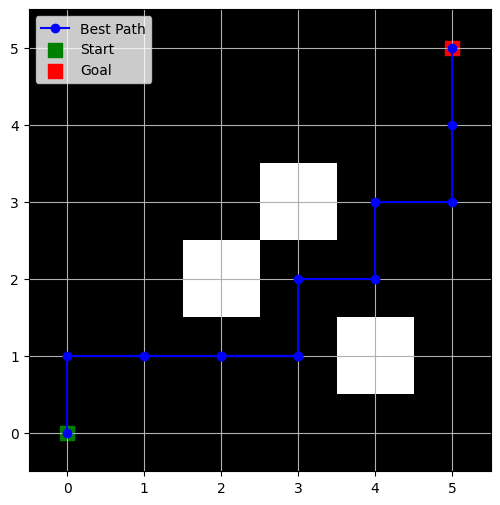

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Define Grid Environment
GRID_SIZE = 6  # 6x6 Grid
START = (0, 0)
GOAL = (5, 5)
OBSTACLES = {(2, 2), (3, 3), (1, 4)}  # Set of obstacle coordinates

# Parameters for ACO
NUM_ANTS = 10
EVAPORATION_RATE = 0.2
PHEROMONE_IMPORTANCE = 1.0
HEURISTIC_IMPORTANCE = 2.0
INITIAL_PHEROMONE = 1.0

# Initialize Pheromone Grid
pheromones = np.ones((GRID_SIZE, GRID_SIZE)) * INITIAL_PHEROMONE

# Generate available moves
def get_valid_moves(x, y):
    moves = [(x+1, y), (x, y+1), (x-1, y), (x, y-1)]
    return [(nx, ny) for nx, ny in moves if 0 <= nx < GRID_SIZE and 0 <= ny < GRID_SIZE and (nx, ny) not in OBSTACLES]

# Ant movement based on pheromone and heuristic information
def ant_walk():
    path = [START]
    x, y = START
    while (x, y) != GOAL:
        moves = get_valid_moves(x, y)
        if not moves:
            return []  # Dead end

        # Compute probabilities based on pheromones and heuristic (distance to goal)
        probabilities = []
        for nx, ny in moves:
            pheromone = pheromones[nx, ny] ** PHEROMONE_IMPORTANCE
            heuristic = (1.0 / (abs(GOAL[0] - nx) + abs(GOAL[1] - ny) + 1)) ** HEURISTIC_IMPORTANCE
            probabilities.append(pheromone * heuristic)

        probabilities = np.array(probabilities) / sum(probabilities)
        next_move = moves[np.random.choice(len(moves), p=probabilities)]
        path.append(next_move)
        x, y = next_move
    return path

# Update Pheromones
def update_pheromones(paths):
    global pheromones
    pheromones *= (1 - EVAPORATION_RATE)  # Evaporation
    for path in paths:
        if path:
            reward = 1.0 / len(path)  # Shorter paths get higher rewards
            for x, y in path:
                pheromones[x, y] += reward

# Run ACO Algorithm
def ant_colony_optimization(generations=10):
    best_path = []
    for gen in range(generations):
        paths = [ant_walk() for _ in range(NUM_ANTS)]
        best_path = min([p for p in paths if p], key=len, default=best_path)
        update_pheromones(paths)
        print(f"Generation {gen+1}: Best Path = {best_path}, Length = {len(best_path)}")
    plot_path(best_path)

# Plot the Best Path
def plot_path(best_path):
    grid = np.zeros((GRID_SIZE, GRID_SIZE))
    for ox, oy in OBSTACLES:
        grid[ox, oy] = -1  # Mark obstacles

    path_x, path_y = zip(*best_path)
    plt.figure(figsize=(6,6))
    plt.imshow(grid, cmap='gray_r', origin='lower')
    plt.plot(path_y, path_x, marker='o', color='b', label='Best Path')
    plt.scatter(START[1], START[0], color='g', marker='s', s=100, label='Start')
    plt.scatter(GOAL[1], GOAL[0], color='r', marker='s', s=100, label='Goal')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(GRID_SIZE))
    plt.yticks(range(GRID_SIZE))
    plt.show()

# Run ACO for Path Planning
ant_colony_optimization()
